In [ ]:
# Secret key = nPTCszv0ozUmoMNk2XOxkZgsdCxDlA
# client ID = i_7yRncgG4rVDk_BaCLg7A

In [ ]:
pip install asyncpraw

In [9]:
import os
os.environ["REDDIT_CLIENT_ID"] = "i_7yRncgG4rVDk_BaCLg7A"
os.environ["REDDIT_CLIENT_SECRET"] = "nPTCszv0ozUmoMNk2XOxkZgsdCxDlA"
os.environ["REDDIT_USER_AGENT"] = "Scrapper/1.0 by u/FlyBackground9197"


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter subreddit name: crypto
                                               Title  \
0       [Meta] Regarding the future of the subreddit   
1  Crypto is not cryptocurrency - Welcome to the ...   
2  Apple turns off data protection in the UK rath...   
3  Probe Security Without Identification - Anonym...   
4  How far can i push close-source code towards b...   

                                             Content Sentiment  
0  A bit late notice compared to a lot of the oth...   Neutral  
1                                                     Negative  
2                                                      Neutral  
3                                                     Positive  
4  im familiar with Kerckhoffs principle and the ...   Neutral  


<ipython-input-11-798654fe166a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette='coolwarm')


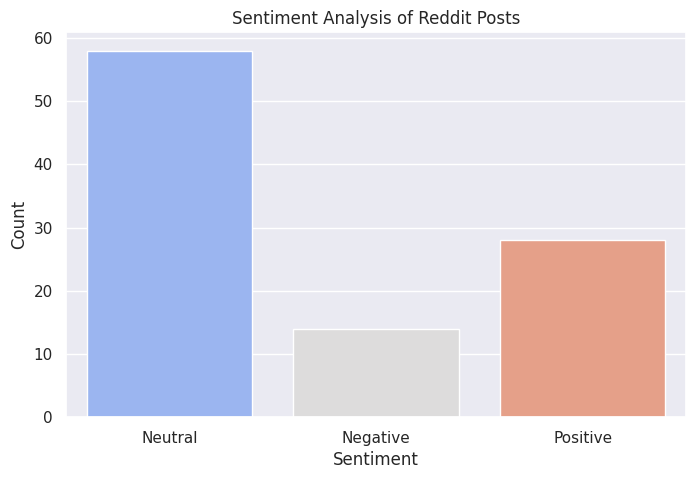

Model saved successfully!


In [11]:
import os
import asyncpraw
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import asyncio
import nest_asyncio

# Allow asyncio to run inside Jupyter Notebook
nest_asyncio.apply()

# Download VADER lexicon
nltk.download('vader_lexicon')

async def fetch_reddit_data(subreddit_name, limit=100):
    reddit = asyncpraw.Reddit(
        client_id=os.getenv("REDDIT_CLIENT_ID"),
        client_secret=os.getenv("REDDIT_CLIENT_SECRET"),
        user_agent=os.getenv("REDDIT_USER_AGENT")
    )

    subreddit = await reddit.subreddit(subreddit_name)
    posts = []

    async for post in subreddit.hot(limit=limit):
        posts.append([post.title, post.selftext])

    df = pd.DataFrame(posts, columns=['Title', 'Content'])
    await reddit.close()
    return df

def analyze_sentiment(df):
    sia = SentimentIntensityAnalyzer()

    def get_sentiment(text):
        score = sia.polarity_scores(text)['compound']
        if score >= 0.05:
            return 'Positive'
        elif score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    df['Sentiment'] = df['Title'].apply(get_sentiment)
    return df

def visualize_sentiment(df):
    sns.set(style="darkgrid")
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df['Sentiment'], palette='coolwarm')
    plt.title('Sentiment Analysis of Reddit Posts')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

def save_model():
    sia = SentimentIntensityAnalyzer()
    with open('sentiment_model.pkl', 'wb') as file:
        pickle.dump(sia, file)

if __name__ == "__main__":
    subreddit_name = input("Enter subreddit name: ")
    loop = asyncio.get_event_loop()
    df = loop.run_until_complete(fetch_reddit_data(subreddit_name))
    df = analyze_sentiment(df)
    print(df.head())
    visualize_sentiment(df)
    save_model()
    print("Model saved successfully!")
